<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/D005_M1_Test_DS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q.1 On the given data set, undertake the following exercises: (10 marks)

a. Plot its simple moving average with mean and standard deviation.

b. Undertake seasonal decomposition and extract its Trend and seasonality.

c. Calculate the mean and standard deviation of trend series, and seasonal series.

d. Generate a de-seasonal series and plot it separately.

e. Forecast the series up to 15 point ahead and discuss the steps to generate best
forecast.

Analyze your results and interpret the findings. Focus more on analyzing and justifying the
methods and findings.

In [ ]:
!pip install pyforest 
from pyforest import *

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=5ce21db01b6d65b1eb8bf41eb5bcb71b60e8bf3d5c752967ad12622cd34b2924
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
df = pd.read_csv("/content/data-DS.csv", index_col=0)
df.head()

<IPython.core.display.Javascript object>

,rain
year,
1907,269
1908,321
1909,585
1910,871
1911,1475


In [ ]:
df.describe()

,rain
count,114.000000
mean,1538.017544
std,1585.843914
min,39.000000
25%,348.250000
50%,771.000000
75%,2566.750000
max,6991.000000


In [ ]:
df.isnull().sum()

rain    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rainfall chart')

<Figure size 720x288 with 0 Axes>

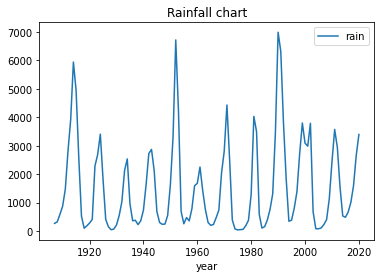

In [ ]:
plt.figure(figsize=(10,4))
df.plot()
plt.title("Rainfall chart")

In [ ]:
timeseries = pd.Series(df.rain.values, index=pd.date_range('1907', periods=2020-1907 + 1, freq='Y'))
timeseries

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1907-12-31     269
1908-12-31     321
1909-12-31     585
1910-12-31     871
1911-12-31    1475
              ... 
2016-12-31     662
2017-12-31    1000
2018-12-31    1590
2019-12-31    2657
2020-12-31    3396
Freq: A-DEC, Length: 114, dtype: int64

# 1.a Plot its simple moving average with mean and standard deviation.

In [ ]:
# Function for plotting simple moving average 
def plot_rolling(timeseries, window=4):
  rol_mean = timeseries.rolling(window).mean()
  rol_std = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12,6))
  og = plt.plot(timeseries, color = "blue", label = "Original Time Series")
  mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean Series")
  std = plt.plot(rol_std, color = "black", label = "Rolling S.D Series")
  plt.legend(loc = "best")
  plt.title(f"Rolling Mean and S.D (window={window})" )
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

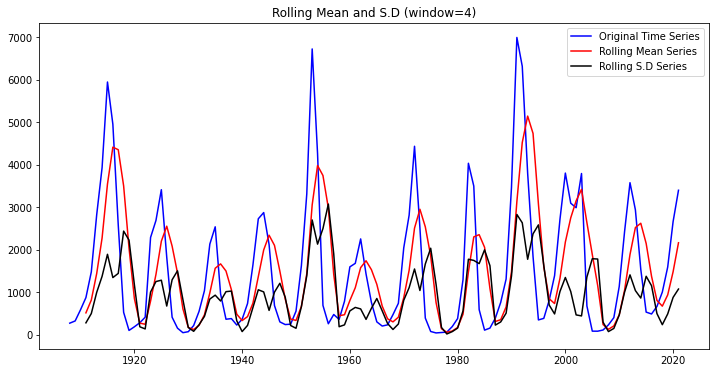

In [ ]:
plot_rolling(timeseries)

# 1.b Undertake seasonal decomposition and extract its Trend and seasonality.

In [ ]:
!pip install stldecompose

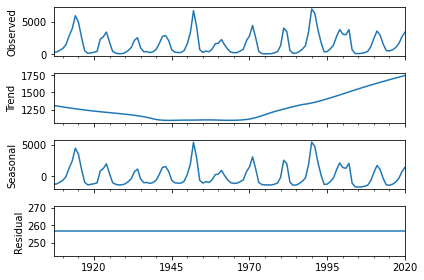

In [ ]:
from stldecompose import decompose
decomposed_timeseries = decompose(timeseries)
decomposed_timeseries.plot()
decomposed_timeseries

There is constant seasonal and residual component for our series 

In [ ]:
trend = decomposed_timeseries.trend
seasonality = decomposed_timeseries.seasonal
res = decomposed_timeseries.resid

#1.c Calculate the mean and standard deviation of trend series, and seasonal series.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

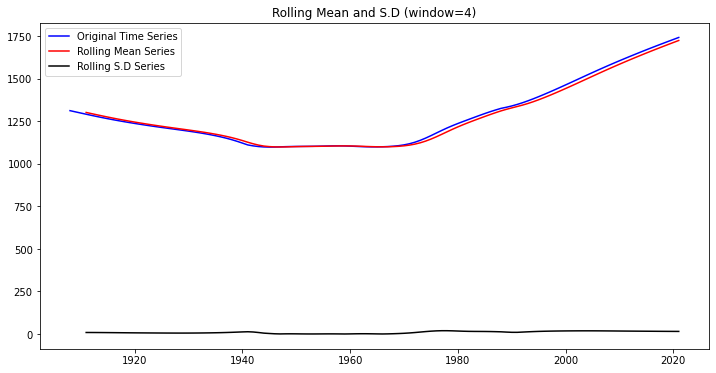

In [ ]:
# Rolling mean for the trend series 
plot_rolling(trend,4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

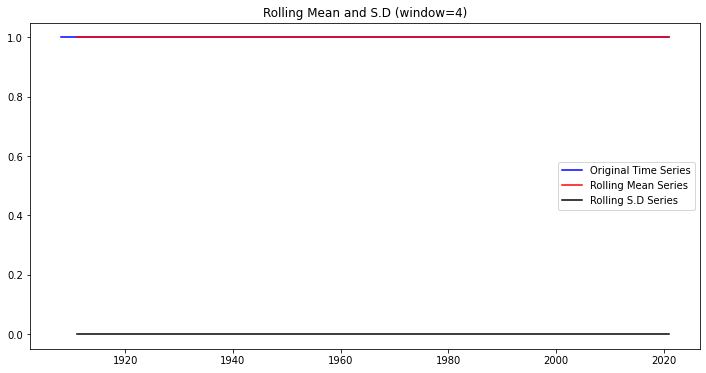

In [ ]:
# Rolling mean for the seasonality series 
plot_rolling(sesonality,4)

In [ ]:
#Mean and Standard Deviation for the trend
trend.mean(), trend.std()

(1281.2915826295564, 187.06141126614222)

In [ ]:
#Mean and Standard Deviation of the seasonality 
seasonality.mean(), seasonality.std()

(-1.994505924940632e-15, 1578.939492000905)

Seasonality has negligible mean approaching 0 and constant standard deviation

#1.d. Generate a de-seasonal series and plot it separately.

In [ ]:
deseasonal_series = timeseries- seasonality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Deseasonal Series')

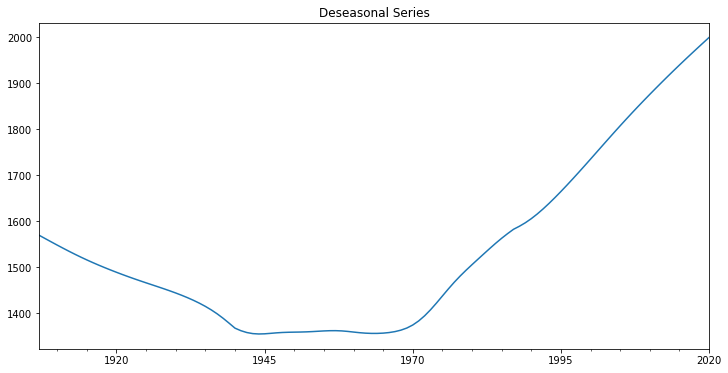

In [ ]:
plt.figure(figsize=(12,6))
deseasonal_series.plot()
plt.title("Deseasonal Series")

#1.e Forecast the series up to 15 point ahead and discuss the steps to generate best forecast.

In [ ]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import mean
forecast_series = forecast(decomposed_timeseries, steps = 15, fc_func= mean, seasonal= True)
forecast_series.head(10)

,mean+seasonal
2022-01-01,430.588292
2023-01-02,493.594498
2024-01-03,765.913108
2025-01-03,1056.659409
2026-01-04,1668.500846
2027-01-05,3021.212214
2028-01-06,4134.308427
2029-01-06,6155.786648
2030-01-07,5168.766277
2031-01-08,2801.482972


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

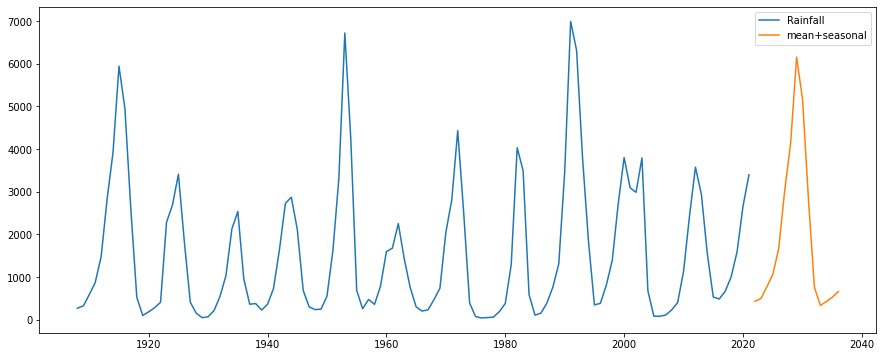

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(timeseries, label = 'Rainfall')
plt.title("Rainfall Forecast")
plt.plot(forecast_series, label = forecast_series.columns[0])
plt.legend()

#Q2. Introduce the problem of stationarity and write short notes of the followings along with their empirical discussions. (10 marks)

a. What is Auto-correlation (ACF) and Partial Auto Correlation Functions(PACF), and what is its hypothesis and relevance?


b. Using the data set, generate percentage change and normalized series and discuss its time series properties.


c. Generate ACF and PACF of the given original data set, its percentage change and normalized data set.

d. Undertake stationarity test with original data set, its percentage change and normalized data set.

#1.a What is Auto-correlation (ACF) and Partial Auto Correlation Functions(PACF), and what is its hypothesis and relevance?

Ans: 
1.   We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times it is called an Autocorrelation. __A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function__
2. A partial autocorrelation is removing intermediate relationships of correlations. Basically it is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
3. ACF and PACF are used to find the AutoRegressive(AR) lag and Moving Average Lag
4. PACF is used to Identify the MA lags and ACF is used to identify AR lags



#1.b. Using the data set, generate percentage change and normalized series and discuss its time series properties.

In [ ]:
# percentage change 
pct_change = timeseries.pct_change() 
pct_change

1907-12-31         NaN
1908-12-31    0.193309
1909-12-31    0.822430
1910-12-31    0.488889
1911-12-31    0.693456
                ...   
2016-12-31    0.364948
2017-12-31    0.510574
2018-12-31    0.590000
2019-12-31    0.671069
2020-12-31    0.278133
Freq: A-DEC, Length: 114, dtype: float64

In [ ]:
#Normalized series 
#normalized_series = (timeseries - timeseries.min())/(timeseries.max() - timeseries.min())
normalized_series = np.random.normal(loc= timeseries.mean(), scale = timeseries.std(), size = timeseries.shape[0])
normalized_series

<IPython.core.display.Javascript object>

array([ -342.43164181,  2020.35809959,  3618.01004241,  2069.1877192 ,
         360.2525636 ,  2410.84561367,  1018.47132473,  1427.74590783,
         -35.88560189,  -607.25899589,  -778.41425718,  4056.34454985,
        1604.15977631,  3989.30383192,  1227.39545377,   282.03298778,
        4081.50520004, -1745.60000557,  4558.41252365,   869.48378221,
        1895.94521511,  2993.92781587,  2048.19760649,   840.18634813,
         881.21663213,  3226.90571063,  1260.3326543 ,  3265.7564568 ,
         492.7478801 ,  1842.47887279,  3209.79317372,   195.9690652 ,
        6262.82074267,   472.9099505 ,  3948.27362603,  3255.24929065,
        -272.07374724,  3224.74622284,   628.15488351,   497.6775766 ,
          46.16354988,  -258.6193123 ,  1266.0208429 , -2444.58105742,
        1059.24214757,   719.11406735,  -504.56128671,   699.01900344,
        1240.99445941,   878.71594983,  2961.24997279,  2099.49300924,
        2738.94541084,  1432.490051  ,  3554.08355371,  -115.53749669,
      

In [ ]:
timeseries.describe()

count     114.000000
mean     1538.017544
std      1585.843914
min        39.000000
25%       348.250000
50%       771.000000
75%      2566.750000
max      6991.000000
dtype: float64

Timeseries has relatively high range (6991 - 39) and high mean 

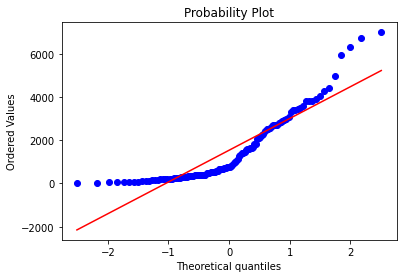

In [ ]:
import scipy.stats 
import pylab
scipy.stats.probplot(timeseries, plot = pylab)
pylab.show()

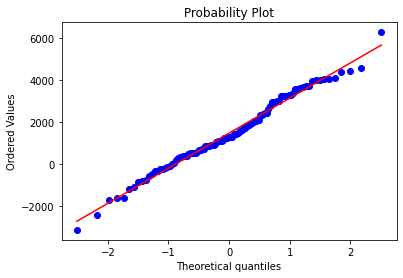

In [ ]:
# for normalized series 
import scipy.stats 
import pylab
scipy.stats.probplot(normalized_series, plot = pylab)
pylab.show()

#1.c. Generate ACF and PACF of the given original data set, its percentage change and normalized data set.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

ACF and PACF For the orginal dataset 

<IPython.core.display.Javascript object>

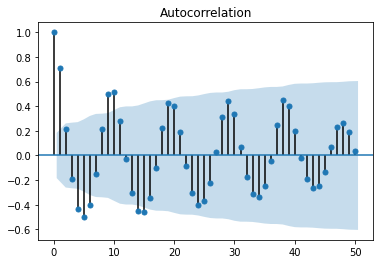

<IPython.core.display.Javascript object>

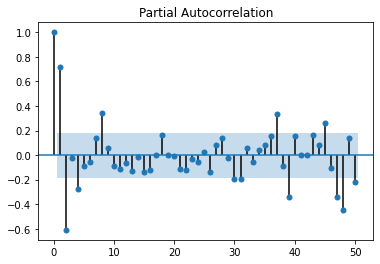

In [ ]:
plot_acf(timeseries, lags=50)
plt.show()
plot_pacf(timeseries, lags=50)
plt.show()

ACF and PACF For the pct change dataset 

<IPython.core.display.Javascript object>

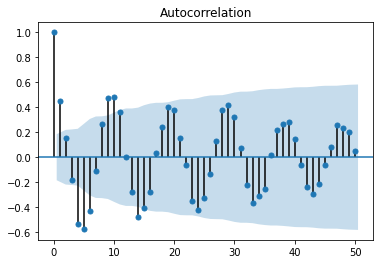

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



<IPython.core.display.Javascript object>

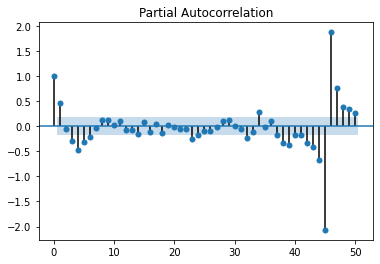

In [ ]:
plot_acf(pct_change[1:], lags=50)
plt.show()
plot_pacf(pct_change[1:], lags=50)
plt.show()

ACF and PACF For the normalized data

<IPython.core.display.Javascript object>

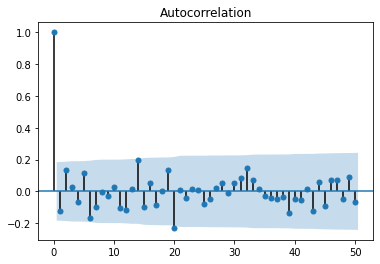

<IPython.core.display.Javascript object>

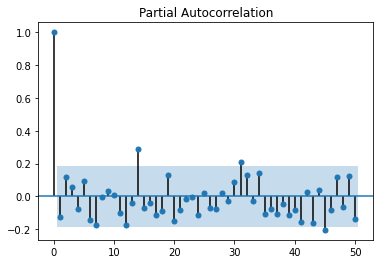

In [ ]:
plot_acf(normalized_series, lags=50)
plt.show()
plot_pacf(normalized_series, lags=50)
plt.show()

#1.d. Undertake stationarity test with original data set, its percentage change and normalized data set.

In [ ]:
# Dickey Fuller Test for the original Dataset 
import statsmodels.tsa.stattools as sts
sts.adfuller(timeseries)

(-2.996303675142558,
 0.03524103535901374,
 7,
 106,
 {'1%': -3.4936021509366793,
  '10%': -2.58153320754717,
  '5%': -2.8892174239808703},
 1635.975223662428)

We have to accept the hypothesis(ie autoregressive model) for 10% and 5% confidence intervals for the original series. Hence the series is autoregressive series. We reject the hypothesis for the 1% interval, hence we can say that for 1% interval, the series is following a stationary process. 

In [ ]:
# Dickey Fuller Test for the normalized dataset
sts.adfuller(normalized_series)

(-2.3720137701921282,
 0.14979159046092788,
 13,
 100,
 {'1%': -3.497501033, '10%': -2.5824349, '5%': -2.89090644},
 1768.4114542363043)

Since z value is greater than all the values we can say that the normalized series is stationary and reject the null hypothesis and accept the alternate hypothesis. 
This is very evident from the fact that we had already created the series using a normal process. 

In [ ]:
# Dickey Fuller Test for the pct change dataset
sts.adfuller(pct_change[1:])

(-8.032506526506944,
 1.9413286947885083e-12,
 5,
 107,
 {'1%': -3.492995948509562,
  '10%': -2.58139291903223,
  '5%': -2.888954648057252},
 211.46041537868268)

For percentage change we accept the null hypothesis, that the series is stationary series. After taking first difference, the series turns stationary. Also from the ACF/PCF plots it is quite evident that the series is AR(1) process hence, the percentage change in the rainfall is a stationary process. 